In [24]:
import tensorflow.keras as kr 
import pickle
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#last excercise was to do this, so im not going show you my script
# Opening the files about data
train_images = pickle.load(open("./features.pickle", "rb"))
#train_images /= 255

train_labels = pickle.load(open("./labels.pickle", "rb"))
#train_labels = np.asarray(train_labels)

In [26]:
print("es ",type(train_images))
print(train_images.shape)

print("es ",type(train_labels))
print((train_labels.shape))

es  <class 'numpy.ndarray'>
(3946, 50, 50, 1)
es  <class 'numpy.ndarray'>
(3946,)


In [27]:
#from IPython.core.display import display, HTML

model = kr.Sequential([
    kr.layers.Conv2D(16, (5, 5 ),activation = 'relu',input_shape = train_images.shape[1:]),
    kr.layers.Conv2D(32, (5, 5),activation = 'relu'),
    kr.layers.MaxPooling2D(2,2),
    kr.layers.Conv2D(64, (3, 3),activation = 'relu'),
    kr.layers.Conv2D(64, (3, 3),activation = 'relu'),
    kr.layers.MaxPooling2D(2,2),
    kr.layers.Conv2D(128, (3, 3),activation = 'relu'),
    kr.layers.MaxPooling2D(2,2),
    kr.layers.Dropout(0.25),
    kr.layers.Flatten(),
    #kr.layers.Conv2D(128, (3, 3),activation = 'relu'),
    #kr.layers.MaxPooling2D(2,2),
    kr.layers.Flatten(),
    kr.layers.Dense(128, activation="relu"),
    kr.layers.Dropout(0.3),
    kr.layers.Dense(128, activation="relu"),
    kr.layers.Dropout(0.3),
    kr.layers.Dense(128, activation="relu"),
    #kr.layers.Dense(32, activation="relu"),
    #kr.layers.Dense(16, activation="relu"),
    kr.layers.Dense(2, activation="softmax")
    #kr.layers.Dense(1, activation="sigmoid")
])


In [28]:
class TrainingPlot(kr.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

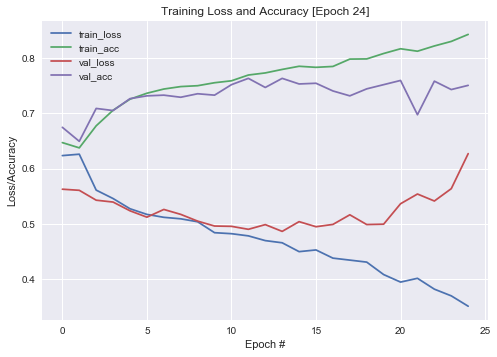

3156/3156 [==============================] - 33s 10ms/sample - loss: 0.3510 - acc: 0.8428 - val_loss: 0.6270 - val_acc: 0.7506


In [29]:
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Compiling the model using some basic parameters
model.compile( loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Y entrenamos al modelo. Los callbacks 
#model.fit(train_images,train_labels, epochs=20)
#model.fit(train_images,train_labels,batch_size=32,epochs=25,validation_split=0.2)
model.fit(train_images,train_labels,batch_size=32,epochs=25,validation_split=0.2, callbacks = [plot_losses])
#model.fit(train_images,train_labels,batch_size=32,epochs=30 ,validation_split=0.3 ,steps_per_epoch = 10)

In [6]:
#model.save("model.Aveztruz")
model.save("model.MLA")

In [7]:
print("TERMINO")

TERMINO
